<h1>Import necessary package and modules</h1>

In [1]:
from matplotlib import pyplot as plt
from jungle import  Jungle
from hiker import HikerAgent
import numpy as np
import pandas as pd

<h1>SetParameters </h1>

In [2]:
#Set Q Learning parameters
experiment_name = "exp1"
episodes = 2000
timesteps = 200

parameters = [
    {"experiment_id":1, "seed":5, "sarsa":False, "epsilon": 1, "alpha":0.7, "gamma": 0.9, "epsilon_decay":0.999, "timesteps":timesteps, "episodes":episodes, "display":["epsilon"]},
    {"experiment_id":2, "seed":5, "sarsa":False,  "epsilon": 0.9, "alpha":0.7, "gamma": 0.9, "epsilon_decay":0.999, "timesteps":timesteps, "episodes":episodes, "display":["epsilon"]},
    {"experiment_id":3, "seed":5, "sarsa":False,  "epsilon": 0.5, "alpha":0.7, "gamma": 0.9, "epsilon_decay":0.999, "timesteps":timesteps, "episodes":episodes, "display":["epsilon"]},
    {"experiment_id":4, "seed":5, "sarsa":False,  "epsilon": 0, "alpha":0.7, "gamma": 0.9, "epsilon_decay":0.999, "timesteps":timesteps, "episodes":episodes, "display":["epsilon"]}
]


# parameters = [
#     {"experiment_id":1, "sarsa":False,  "epsilon": 0.9,  "alpha":0.7, "gamma": 0.7, "epsilon_decay":0.999, "timesteps":100, "episodes":episodes, "display":["sarsa"]},
#     {"experiment_id":2, "sarsa":True,   "epsilon": 0.9,  "alpha":0.7, "gamma": 0.7, "epsilon_decay":0.999, "timesteps":100, "episodes":episodes, "display":["sarsa"]}
#     ]


In [3]:
#Create the Jungle and display 

In [4]:
'''
jungle = Jungle(rows=5,cols=4,vanishing_treasure=False)
jungle.add_topography([(1, 3, "M")])
jungle.add_topography([(2, 2, "S")])
jungle.add_topography([(4, 3, "B")])
jungle.add_topography([(5, 2, "R")])
jungle.add_topography([(4, 1, "L")])
jungle.add_topography([(4, 4, "E"), (5, 4, "E")])
jungle.add_topography([(1, 4, "T")])
'''
jungle = Jungle(rows=7,cols=4,vanishing_treasure=False,seed=45)
jungle.add_topography([(1, 3, "M")])
jungle.add_topography([(2, 3, "M")])
jungle.add_topography([(4, 1, "L")])
jungle.add_topography([(4, 3, "B")])
jungle.add_topography([(4, 4, "E")])
jungle.add_topography([(5, 2, "R")])
jungle.add_topography([(7, 1, "$")])
jungle.add_topography([(7, 3, "S")])
jungle.add_topography([(7, 4, "E")])
jungle.add_topography([(6, 1, "T")])

jungle.fill_r_matrix()

print(jungle.jungle_floor)



[['_' '_' 'M' '_']
 ['_' '_' 'M' '_']
 ['_' '_' '_' '_']
 ['L' '_' 'B' 'E']
 ['_' 'R' '_' '_']
 ['T' '_' '_' '_']
 ['$' '_' 'S' 'E']]


<h1>Start Policy Learning</h1>

In [5]:
results = []
for kwargs in parameters:
    hiker = HikerAgent(jungle=jungle,sarsa = kwargs["sarsa"])
    results += hiker.train(**kwargs)

<h1>Display the results</h1>

</h1>Save the results to file</h1>

In [6]:
import pandas as pd

my_df = pd.DataFrame(results)
my_df.to_csv(experiment_name + "/" + experiment_name + "_results.csv",header = True, index= True)


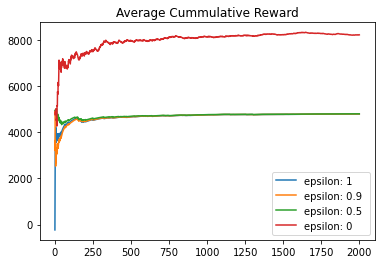

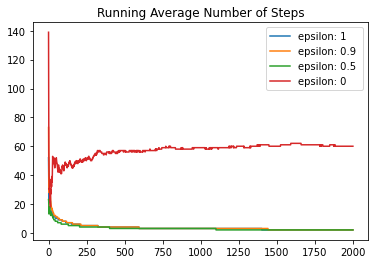

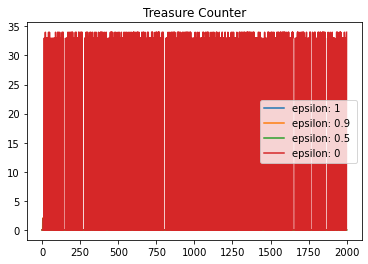

In [7]:

for params in parameters:
    # Get the experiment id
    id = params["experiment_id"]

    # Get all the results for this experiment
    exp_res = [res for res in results if res["experiment_id"] == id]
    settings = exp_res[0]["parameters"]
    display_params = exp_res[0]["parameters"]["display"]
    
    
    # Build the label
    display_label = ""
    for item in display_params:
        display_label += item + ": " + str(settings[item]) + " "


    # For the experiment, get the metrics to display
    rewards = np.array([[res["episode"], res["episode_reward"], 0] for res in exp_res])
    steps_in_episode = np.array([[res["episode"], res["steps_taken"], 0] for res in exp_res])
    ending_topography = np.array([[res["episode"], res["topography"], 0] for res in exp_res])
    treasure_counter = np.array([[res["episode"], res["treasure_counter"], 0] for res in exp_res])


    for i in range(len(rewards)):
        rewards[i][2] = sum(rewards[0:i + 1, [1]]) / (i + 1)  # calculate the average cumulative reward
        steps_in_episode[i][2] = sum(steps_in_episode[0:i + 1, [1]]) / (i + 1)  # calculate the average number of steps
        #treasure_counter[i][2] = sum(treasure_counter[0:i + 1, [1]]) / (i + 1)  # calculate the average number of steps
   
    plt.figure(1)
    plt.plot(rewards[:, [0]], rewards[:, [2]], label=display_label)
    plt.title("Average Cummulative Reward")
    plt.figure(2)
    plt.plot(steps_in_episode[:, [0]], steps_in_episode[:, [2]], label=display_label)
    plt.title("Running Average Number of Steps")
    plt.figure(3)
    plt.plot(treasure_counter[:, [0]], treasure_counter[:, [1]], label=display_label)
    plt.title("Treasure Counter")


plt.figure(1)
plt.legend()

plt.figure(2)
plt.legend()

plt.figure(3)
plt.legend()


plt.show()

In [8]:
print(treasure_counter)

[[   0    0    0]
 [   1    0    0]
 [   2    0    0]
 ...
 [1997    0    0]
 [1998    0    0]
 [1999   34    0]]
